# 61011 Week 1

## Level 0
You should find the exercises in this level very simple to complete. All of the of the information required to complete these exercises can be found at www.learnpython.org. The cells below provide some skeleton code and some additional questions, but you should attempt to complete these exercises without using the skeleton code first.

If you **do** need to refer to the skeleton code, you will struggle with the remainder of the labs. In this case, we strongly advise going through the entire tutorial at www.learnpython.org before proceeding to Level 1.

### Write a loop to sum the even numbers from 1 to 100
Before looking at the code below, think about whether a FOR loop or WHILE loop is more appropriate for this problem.

Type your answer here before revealing the answer below

Answer: Both loops can be used to complete the task. In general, a FOR loop should be used when the number of iterations (times around the loop) is pre-determined. This is the case here, when we know, before entering the loop, that we will loop through 50 even numbers

A WHILE loop is often slightly slower, as it needs to check a Boolean condition each time the loop is executed. Later in the course, we will see that WHILE loops are necessary when we have a stopping criterion for an iterative algorithm.

The code below is a skeleton. Replace the 'xx's 

In [15]:
count = 0
for i in range(0, 100, 2):
    count = count + i
    
print(count)

2450


Answer: count = 2450

### sum the even numbers 1 to 100 without a loop

In [16]:
vec = range(0,100,2)
count = sum(vec)
print(count)

2450


Answer: count = 2450

### Write a function to return the sum of its arguments and call it.

In [17]:
def addXY(a,b):
    return a+b
    
# call function below:
print(addXY(3,2))
print(addXY(1,-1))
print(addXY(500,30))

5
0
530


Answer: 5, 0, 530

### Write a function to return the sum of all the even numbers up to a given number, x

In [18]:
def sumEven(x):
    count = 0
    vec = range(0,x,2)
    return(sum(vec))

print(sumEven(100))

2450


Answer: 2450

## Level 1

Work through the tutorial at http://scikit-learn.org/stable/tutorial/basic/tutorial.html, if you are not already familiar with the scikit library

You should start a new jupyter notebook (or create a new Python script within the Spyder IDE, if you prefer) and copy and paste the code snippets as required. For the moment, you do not need to understand what the SVC function does - you may treat it as a 'black box'. This will become clear when we learn about Support Vector Machines.

It is critically important that you understand how models are first created, and then trained using the *fit* function.

You should also understand that the trained model is **not** saved, unless you use pickle. This is all covered in the tutorial.

### Use SKlearn to load a dataset, and display it on the screen

In [19]:
# SKlearn has a set of built-in datasets. The way to load these is given in the
# scikit tutorial. In general, you will apply machnine learning techniques to
# datasets that are not included. The skeleton code below takes you through the
# process of importing an external data set in csv format.


# 1.) first, download the breast cancer data set from here: https://archive.ics.uci.edu/m.l/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
# n.b. the data is in the file breast-cancer-wisconsin.data. If you want to view it in a 
# text editor/ excel, then you will need to rename the file as a .csv

# 2.) import the data - make sure you understand what the options (header=None, na_values=['?']) are doing
import pandas as pd #import the pandas library for data manipulation
cancer_data = pd.read_csv("breast-cancer-wisconsin.data.csv", header=None, na_values=['?'])

# 3.) Display the first few lines of the dataset
cancer_data.head()


,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [20]:
# 4.) generate summary statistics for the dataset
# n.b. column 0 is a user id (uninformative), so we should ignore it from here

cancer_data = cancer_data.loc[:,1:] # make sure you understand what this line is doing

#calculate mean
cancer_data.mean()

1     4.417740
2     3.134478
3     3.207439
4     2.806867
5     3.216023
6     3.544656
7     3.437768
8     2.866953
9     1.589413
10    2.689557
dtype: float64

In [21]:
# calculate standard deviation
cancer_data.std()

1     2.815741
2     3.051459
3     2.971913
4     2.855379
5     2.214300
6     3.643857
7     2.438364
8     3.053634
9     1.715078
10    0.951273
dtype: float64

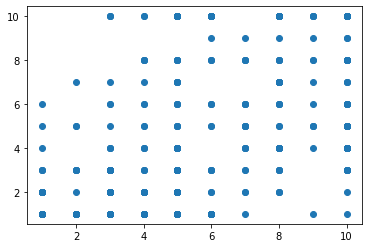

In [22]:
# 5.) Plot two of the feature variables
# first, we need to import a plotting library
import matplotlib.pyplot as plt
plt.scatter(cancer_data.loc[:,1],cancer_data.loc[:,2])

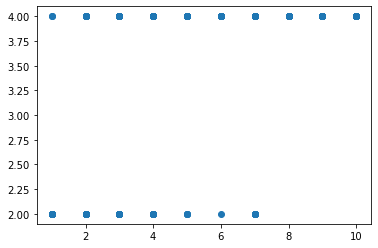

In [23]:
plt.scatter(cancer_data.loc[:,7],cancer_data.loc[:,10])

For the previous two plots, you should be able to explain, in words, what is being plotted. Which of the two plots is more useful, and why?

### Use SKlearn to build a logistic regression model, then to train it

In [24]:
import numpy as np

#remove any rows with missing data
cancer_data = cancer_data.dropna()

# split the data set up into features (columns 1 to 9) and labels (column 10). Convert the data from a dataframe structure
# into an array. Note that we have used a dataframe now as it is easier to manipulate a dataset. However, the sklearn library
# requires inputs to be arrays.
features = cancer_data.loc[:,:9].to_numpy()
labels = cancer_data.loc[:,10].to_numpy()

### Splitting data into testing and training
In Machine Learning, we want to estimate whether our trained model is generalisable to new data. To do this, we typically split up our whole data set into a training set and a testing set (there is no fixed rule on the percentage of each set - whatever seems reasonable).

For some algorithms, we may choose to divide the training set into two: a training set and a validation set. This occurs when we want to adjust some model parameters, and will be introduced later in the course.

We note that splitting the data in this way may not be optimal - by luck, we might split the data in such a way that the model performs better than expected (for instance, if the test set happens to contain lots of easy examples to classify). A more rigorous approach is to use a method called *cross-validation*. In this method, we use a different sample to create a different training set and test set multiple times. This gives us a range of similar, but slightly different models, from which we can calculate confidence intervals on our predictions.

Below, we divide the dataset into a 70% training set and a 30% test set, before training a logistic regression on the training set.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

clf = LogisticRegression(random_state = 0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

Note the way that models are created and trained in sklearn. In all cases, a model is first created, and then fitted using the training data. Once the model has been trained, we can use it to make predictions, as below:

In [26]:
clf.predict(X_test)

array([4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2,
       4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 2,
       2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 2,
       2, 2, 4, 4, 4, 2, 2])

the predict step gives us the raw predictions, but we are really interested to know whether the prediction matches the actual labels, Y_test. We can summarise how well the predictions match reality using various metrics (including sensitivity, specificity, and f1 score). For now, we will use % correct (accuracy)

In [27]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9560975609756097

### Plot the testing performance of a logistic regression for different learning rates
The standard logistic regression model in sklearn uses the *liblinear* solver to learn the model weights. This solver does not require a learning rate. In contrast, the stochastic gradient descent algorithm requires a learning rate. The learning rate tells the computer how much the model weights can change at each iteration of the algorithm. If the learning rate is too large, it can overshoot the true solution. If it is too small, then it takes a long time to converge to the solution.

In this case, we set the algorithm to end when either there has been 1000 iterations (epochs), or if the error does not change by more than 1e-3 between iterations. The first condition is to prevent us waiting all day. The second condition is one way of determining that the algorithm has converged to a solution. This combination of end points means that in some cases, we might stop before the algorithm has finished converging to the solution.

To examine this effect, edit the code sample below.


In [29]:
# fit logistic regression with different learning rates
#  the parameter solver sets the method by which the likelihood is maximised - other choices include 'newton-cg' i.e. newton conjugate gradient descent
from sklearn.linear_model import SGDClassifier

#put FOR loop round this to change the learning rate.
rate = 1
clf = SGDClassifier(max_iter = 1000, tol = 1e-3, random_state=0, learning_rate='constant', eta0=rate)
clf.fit(X_test, y_test)
out = clf.predict(X_test)
accuracy_score(y_test,out)

0.9658536585365853